#Ranking Countries based on taken good measures

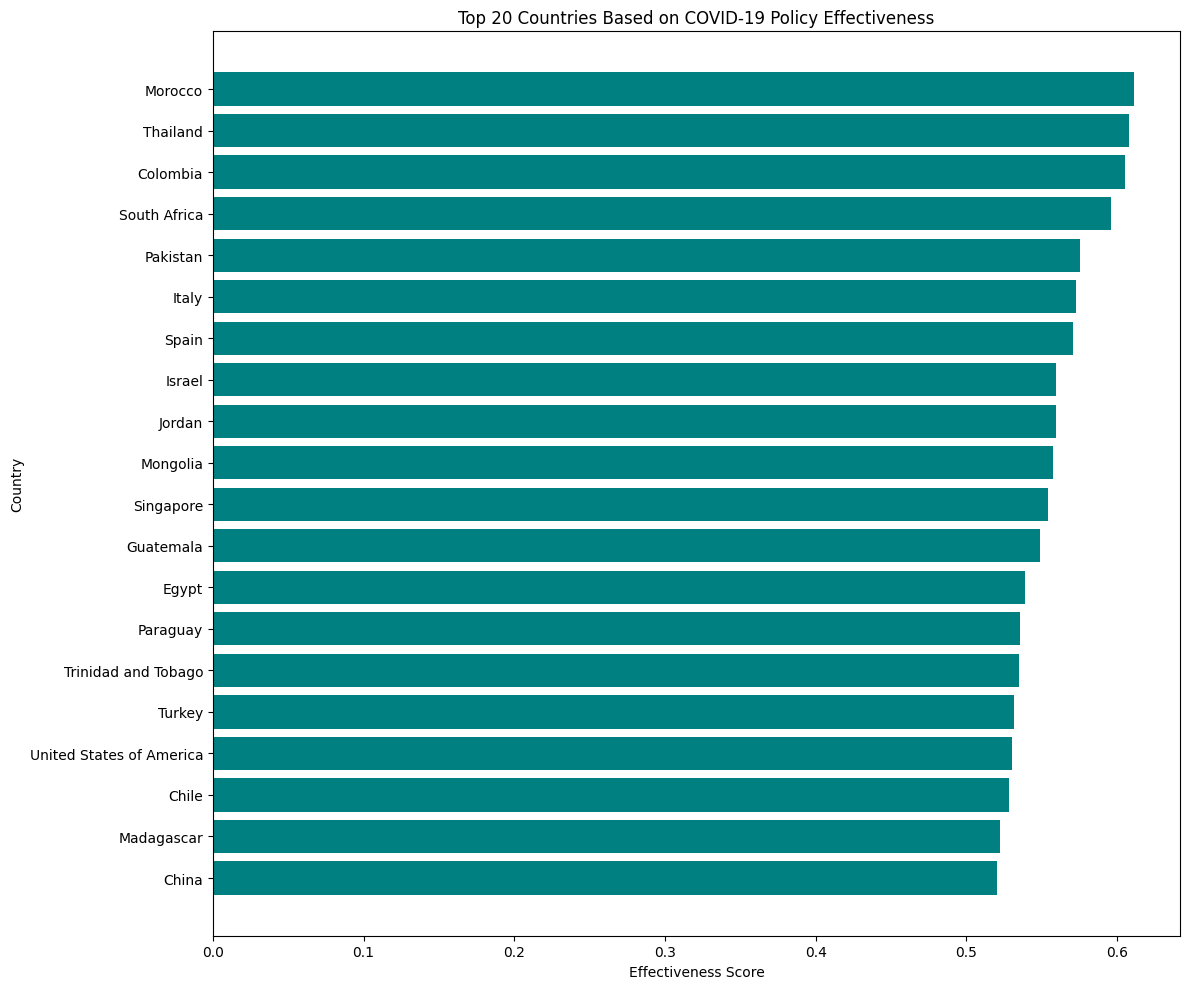

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset (assuming it's in CSV format)
df = pd.read_csv("/content/preprocessed_dataset.csv")

# Handling missing values only for numeric columns
df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)

# Normalizing relevant features
scaler = MinMaxScaler()
features = ["Rigidity_Public_Health", "Economic_Measures"]
df[features] = scaler.fit_transform(df[features])

# Creating a Policy Effectiveness Score
# Giving more weight to public health and economic measures, less to cases/deaths
df["Effectiveness_Score"] = (df["Rigidity_Public_Health"] * 0.5 +
                              df["Economic_Measures"] * 0.5 )

# Applying PCA to reduce dimensions for visualization
pca = PCA(n_components=1)
df["PCA_Score"] = pca.fit_transform(df[["Rigidity_Public_Health", "Economic_Measures"]])

# Ranking countries based on the average effectiveness score
if "country" in df.columns:
    df_sorted = df.groupby("country", as_index=False)["Effectiveness_Score"].mean()
    df_sorted = df_sorted.sort_values(by="Effectiveness_Score", ascending=False)

    # Ensure at least 20 unique countries are present
    if df_sorted["country"].nunique() < 20:
        print("Warning: Less than 20 unique countries available. Using all available countries.")

    # Visualization of top 20 countries
    top_countries = df_sorted.head(20)
    plt.figure(figsize=(12, 10))
    plt.barh(top_countries["country"], top_countries["Effectiveness_Score"], color='teal')
    plt.xlabel("Effectiveness Score")
    plt.ylabel("Country")
    plt.title("Top 20 Countries Based on COVID-19 Policy Effectiveness")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    # Save results
    df_sorted.to_csv("policy_effectiveness_ranking.csv", index=False)
else:
    print("Error: Column 'country' not found in the dataset.")


#Ranking of countries by severity of cases and death

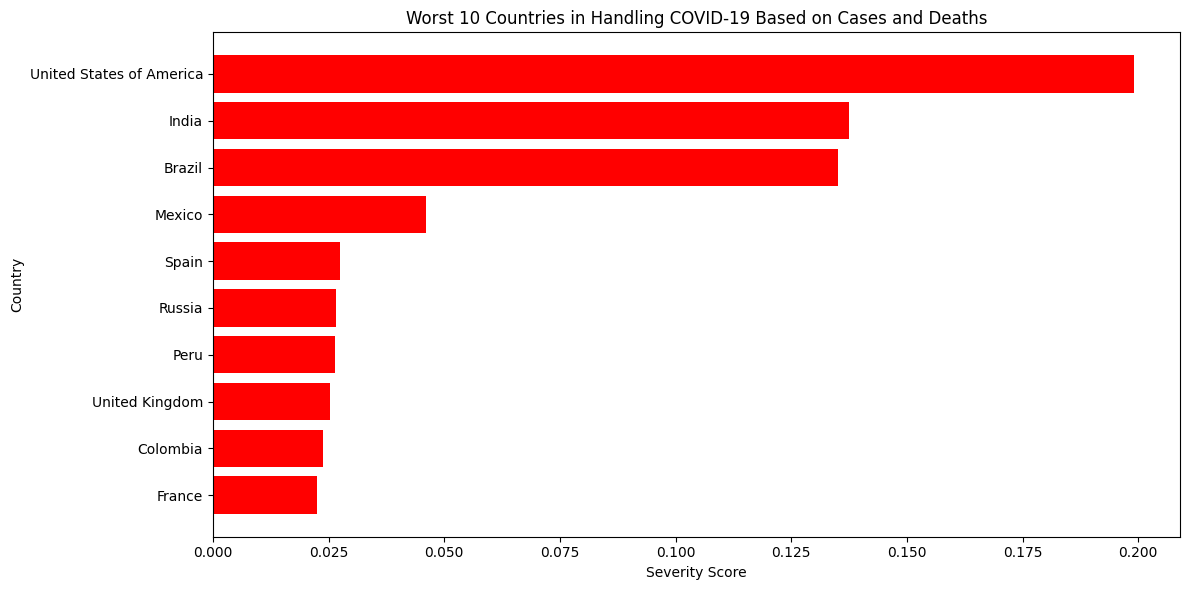

                      country  Severity_Score
215  United States of America        0.199086
93                      India        0.137483
27                     Brazil        0.135216
130                    Mexico        0.046104
189                     Spain        0.027457
168                    Russia        0.026652
160                      Peru        0.026480
214            United Kingdom        0.025393
41                   Colombia        0.023838
70                     France        0.022544


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the dataset (update path if needed)
df = pd.read_csv("/content/preprocessed_dataset.csv")

# Handling missing values for numeric columns
df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)

# Ensure required columns exist
if {"cases", "deaths", "country"}.issubset(df.columns):
    # Normalize cases and deaths for fair comparison
    scaler = MinMaxScaler()
    df[["cases", "deaths"]] = scaler.fit_transform(df[["cases", "deaths"]])

    # Compute a severity score (higher score = worse handling)
    df["Severity_Score"] = (df["cases"] * 0.4 + df["deaths"] * 0.6)

    # Aggregate severity score by country
    df_sorted = df.groupby("country", as_index=False)["Severity_Score"].mean()
    df_sorted = df_sorted.sort_values(by="Severity_Score", ascending=False)

    # Select worst 10 countries
    worst_countries = df_sorted.head(10)

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.barh(worst_countries["country"], worst_countries["Severity_Score"], color='red')
    plt.xlabel("Severity Score")
    plt.ylabel("Country")
    plt.title("Worst 10 Countries in Handling COVID-19 Based on Cases and Deaths")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    # Save results
    df_sorted.to_csv("covid_severity_ranking.csv", index=False)

    # Print worst countries ranking
    print(worst_countries)

else:
    print("Error: Required columns ('cases', 'deaths', 'country') not found in the dataset.")
